# Parameters Initiation

In [8]:
import numpy as np
import pandas as pd

In [9]:
class ModelParameters:
    """
    Encapsulates model parameters
    """

    def __init__(self,
                 all_s0, all_time, all_delta, all_sigma, gbm_mu,
                 jumps_lamda=0.0, jumps_sigma=0.0, jumps_mu=0.0,
                 cir_a=0.0, cir_mu=0.0, all_r0=0.0, cir_rho=0.0,
                 ou_a=0.0, ou_mu=0.0,
                 heston_a=0.0, heston_mu=0.0, heston_vol0=0.0):
        # This is the starting asset value
        self.all_s0 = all_s0
        # This is the amount of time to simulate for
        self.all_time = all_time
        # This is the delta, the rate of time e.g. 1/252 = daily, 1/12 = monthly
        self.all_delta = all_delta
        # This is the volatility of the stochastic processes
        self.all_sigma = all_sigma
        # This is the annual drift factor for geometric brownian motion
        self.gbm_mu = gbm_mu
        # This is the probability of a jump happening at each point in time
        self.lamda = jumps_lamda
        # This is the volatility of the jump size
        self.jumps_sigma = jumps_sigma
        # This is the average jump size
        self.jumps_mu = jumps_mu
        # This is the rate of mean reversion for Cox Ingersoll Ross
        self.cir_a = cir_a
        # This is the long run average interest rate for Cox Ingersoll Ross
        self.cir_mu = cir_mu
        # This is the starting interest rate value
        self.all_r0 = all_r0
        # This is the correlation between the wiener processes of the Heston model
        self.cir_rho = cir_rho
        # This is the rate of mean reversion for Ornstein Uhlenbeck
        self.ou_a = ou_a
        # This is the long run average interest rate for Ornstein Uhlenbeck
        self.ou_mu = ou_mu
        # This is the rate of mean reversion for volatility in the Heston model
        self.heston_a = heston_a
        # This is the long run average volatility for the Heston model
        self.heston_mu = heston_mu
        # This is the starting volatility value for the Heston model
        self.heston_vol0 = heston_vol0

# Intermediate functions

In [2]:
import math
import numpy
import random
import decimal
import scipy.linalg
import numpy.random as nrand
import matplotlib.pyplot as plt

"""
"""

def convert_to_returns(log_returns):
    """
    This method exponentiates a sequence of log returns to get daily returns.
    :param log_returns: the log returns to exponentiated
    :return: the exponentiated returns
    """
    return numpy.exp(log_returns)


def convert_to_prices(param, log_returns):
    """
    This method converts a sequence of log returns into normal returns (exponentiation) and then computes a price
    sequence given a starting price, param.all_s0.
    :param param: the model parameters object
    :param log_returns: the log returns to exponentiated
    :return:
    """
    returns = convert_to_returns(log_returns)
    # A sequence of prices starting with param.all_s0
    price_sequence = [param.all_s0]
    for i in range(1, len(returns)):
        # Add the price at t-1 * return at t
        price_sequence.append(price_sequence[i - 1] * returns[i - 1])
    return numpy.array(price_sequence)

def plot_stochastic_processes(processes, title):
    """
    This method plots a list of stochastic processes with a specified title
    :return: plots the graph of the two
    """
    plt.style.use(['bmh'])
    fig, ax = plt.subplots(1)
    fig.suptitle(title, fontsize=16)
    ax.set_xlabel('Time, t')
    ax.set_ylabel('Simulated Asset Price')
    x_axis = numpy.arange(0, len(processes[0]), 1)
    for i in range(len(processes)):
        plt.plot(x_axis, processes[i])
    plt.show()

# Black-Scholes-Merton Model / Geomertic brownian motion

In [3]:
def brownian_motion_log_returns(param):
    """
    This method returns a Wiener process. The Wiener process is also called Brownian motion. For more information
    about the Wiener process check out the Wikipedia page: http://en.wikipedia.org/wiki/Wiener_process
    :param param: the model parameters object
    :return: brownian motion log returns
    """
    sqrt_delta_sigma = math.sqrt(param.all_delta) * param.all_sigma
    return nrand.normal(loc=0, scale=sqrt_delta_sigma, size=param.all_time)


def brownian_motion_levels(param):
    """
    Returns a price sequence whose returns evolve according to a brownian motion
    :param param: model parameters object
    :return: returns a price sequence which follows a brownian motion
    """
    return convert_to_prices(param, brownian_motion_log_returns(param))

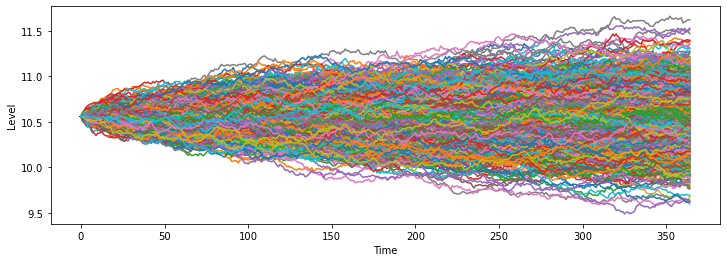

In [5]:
param = ModelParameters(10.56,365,1/365,0.03,0.015)
R=[[]]*1000
for i in range(1000):
    r=brownian_motion_levels(param)
    R[i]=r

plt.figure(figsize=(12, 4))
for path in R:
    path_i = plt.plot(path)
    path_i = plt.xlabel('Time')
    path_i = plt.ylabel('Level')

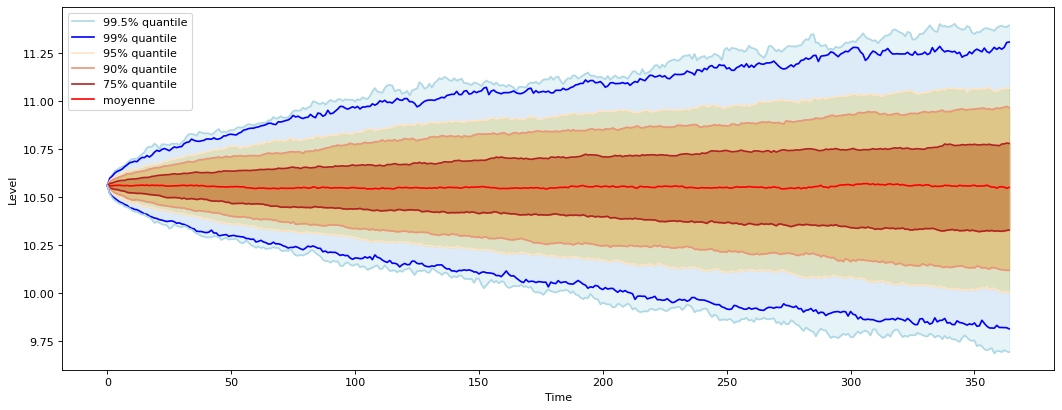

In [10]:
Xt = [[R[j][i] for j in range(1000)] for i in range(365)]
Max = []
qt_99 = []
qt_95 = []
qt_90 = []
qt_75 = []
moy = []
qt_25 = []
qt_10 = []
qt_05 = []
qt_01 = []
Min = []
for x in Xt:
    Max.append(np.quantile(x,0.995))
    qt_99.append(np.quantile(x,0.99))
    qt_95.append(np.quantile(x,0.95))
    qt_90.append(np.quantile(x,0.90))
    qt_75.append(np.quantile(x,0.75))
    moy.append(np.quantile(x,0.5))
    qt_25.append(np.quantile(x,0.25))
    qt_10.append(np.quantile(x,0.1))
    qt_05.append(np.quantile(x,0.05))
    qt_01.append(np.quantile(x,0.01))
    Min.append(np.quantile(x,0.005))

plt.figure(figsize=(16, 6), dpi=80)
plt.plot(Max, color='lightblue', label = "99.5% quantile")
plt.plot(qt_99, color='blue', label = "99% quantile")
plt.plot(qt_95, color='bisque', label = "95% quantile")
plt.plot(qt_90, color='darksalmon', label = "90% quantile")
plt.plot(qt_75, color='firebrick', label = "75% quantile")
plt.plot(moy, color='red', label = "moyenne")
plt.plot(qt_25, color='firebrick')
plt.plot(qt_10, color='darksalmon')
plt.plot(qt_05, color='bisque')
plt.plot(qt_01, color='blue')
plt.plot(Min, color='lightblue')
plt.fill_between(range(365), qt_75, qt_25, color='firebrick', alpha = 1)
plt.fill_between(range(365), qt_90, qt_10, color='darkorange', alpha = 0.5)
plt.fill_between(range(365), qt_95, qt_05, color='gold', alpha = 0.3)
plt.fill_between(range(365), qt_99, qt_01, color='blue', alpha = 0.05)
plt.fill_between(range(365), Max, Min, color='lightblue', alpha = 0.3)
plt.xlabel('Time')
plt.ylabel('Level')
plt.legend()

# Geometric brownian motion jump diffusion Model

In [17]:
def jump_diffusion_process(param):
    """
    This method produces a sequence of Jump Sizes which represent a jump diffusion process. These jumps are combined
    with a geometric brownian motion (log returns) to produce the Merton model.
    :param param: the model parameters object
    :return: jump sizes for each point in time (mostly zeroes if jumps are infrequent)
    """
    assert isinstance(param, ModelParameters)
    s_n = time = 0
    small_lamda = -(1.0 / param.lamda)
    jump_sizes = []
    for k in range(0, param.all_time):
        jump_sizes.append(0.0)
    while s_n < param.all_time:
        s_n += small_lamda * math.log(random.uniform(0, 1))
        for j in range(0, param.all_time):
            if time * param.all_delta <= s_n * param.all_delta <= (j + 1) * param.all_delta:
                # print("was true")
                jump_sizes[j] += random.normalvariate(param.jumps_mu, param.jumps_sigma)
                break
        time += 1
    return jump_sizes


def geometric_brownian_motion_jump_diffusion_log_returns(param):
    """
    This method constructs combines a geometric brownian motion process (log returns) with a jump diffusion process
    (log returns) to produce a sequence of gbm jump returns.
    :param param: model parameters object
    :return: returns a GBM process with jumps in it
    """
    assert isinstance(param, ModelParameters)
    jump_diffusion = jump_diffusion_process(param)
    jump_diffusion_2 = jump_diffusion_process(param)
    geometric_brownian_motion = brownian_motion_log_returns(param)
    up = numpy.add(jump_diffusion, geometric_brownian_motion)
    return numpy.add(jump_diffusion_2, -up)


def geometric_brownian_motion_jump_diffusion_levels(param):
    """
    This method converts a sequence of gbm jmp returns into a price sequence which evolves according to a geometric
    brownian motion but can contain jumps at any point in time.
    :param param: model parameters object
    :return: the price levels
    """
    return convert_to_prices(param, geometric_brownian_motion_jump_diffusion_log_returns(param))

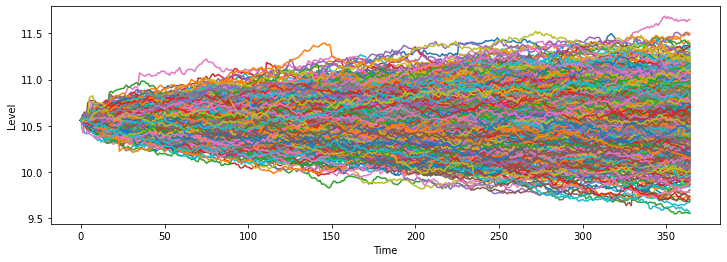

In [21]:
param2 = ModelParameters(10.56,365,1/365,0.03,0.015,0.001,0.01,0.002)
R=[[]]*1000
for i in range(1000):
    r=geometric_brownian_motion_jump_diffusion_levels(param2)
    R[i]=r

plt.figure(figsize=(12, 4))
for path in R:
    path_i = plt.plot(path)
    path_i = plt.xlabel('Time')
    path_i = plt.ylabel('Level')

In [2]:
# Heston Model intermediate functions

In [22]:
import math
import numpy
import random
import decimal
import scipy.linalg
import numpy.random as nrand
import matplotlib.pyplot as plt

"""
"""

def cox_ingersoll_ross_heston(param):
    """
    Cette méthode renvoie les niveaux de taux d'un processus de cox ingersoll ross à retour à la moyenne. Elle est utilisée pour modéliser la volatilité stochastique dans le modèle de Heston. Comme les rendements entre le sous-jacent et la volatilité stochastique doivent être corrélés, nous passons un processus 
    de mouvement brownien corrélé dans la méthode à partir de laquelle les niveaux de taux d'intérêt sont construits. Les niveaux de taux d'intérêt sont construits. L'autre processus corrélé est utilisé dans le modèle de Heston.
    :param param: the model parameters objects
    :return: the interest rate levels for the CIR process
    """
    # We don't multiply by sigma here because we do that in heston
    sqrt_delta_sigma = math.sqrt(param.all_delta) * param.all_sigma
    brownian_motion_volatility = nrand.normal(loc=0, scale=sqrt_delta_sigma, size=param.all_time)
    a, mu, zero = param.heston_a, param.heston_mu, param.heston_vol0
    volatilities = [zero]
    for i in range(1, param.all_time):
        drift = a * (mu - volatilities[i-1]) * param.all_delta
        randomness = math.sqrt(volatilities[i - 1]) * brownian_motion_volatility[i - 1]
        volatilities.append(volatilities[i - 1] + drift + randomness)
    return numpy.array(brownian_motion_volatility), numpy.array(volatilities)


def heston_construct_correlated_path(param, brownian_motion_one):
    """
    Cette méthode est une version simplifiée de la méthode de décomposition de Cholesky pour seulement deux actifs. Elle ne fait 
    pas appel d'algèbre matricielle et est donc assez facile à mettre en œuvre.
    :param param: model parameters object
    :return: a correlated brownian motion path
    """
    # We do not multiply by sigma here, we do that in the Heston model
    sqrt_delta = math.sqrt(param.all_delta)
    # Construct a path correlated to the first path
    brownian_motion_two = []
    for i in range(param.all_time - 1):
        term_one = param.cir_rho * brownian_motion_one[i]
        term_two = math.sqrt(1 - math.pow(param.cir_rho, 2.0)) * random.normalvariate(0, sqrt_delta)
        brownian_motion_two.append(term_one + term_two)
    return numpy.array(brownian_motion_one), numpy.array(brownian_motion_two)

# Heston Model

In [23]:
def heston_model_levels(param):
    """
    Le modèle de Heston est un modèle de mouvement brownien géométrique avec une volatilité stochastique. Cette volatilité 
    stochastique est donnée par le processus cox ingersoll ross. La première étape de cette méthode consiste à construire deux 
    processus GBM corrélés. Un est utilisé pour les prix des actifs sous-jacents et l'autre est utilisé pour les niveaux de 
    volatilité stochastique.
    :param param: model parameters object
    :return: the prices for an underlying following a Heston process
    """
    assert isinstance(param, ModelParameters)
    # Get two correlated brownian motion sequences for the volatility parameter and the underlying asset
    # brownian_motion_market, brownian_motion_vol = get_correlated_paths_simple(param)
    brownian, cir_process = cox_ingersoll_ross_heston(param)
    brownian, brownian_motion_market = heston_construct_correlated_path(param, brownian)

    heston_market_price_levels = [param.all_s0]
    for i in range(1, param.all_time):
        drift = param.gbm_mu * heston_market_price_levels[i - 1] * param.all_delta
        vol = cir_process[i - 1] * heston_market_price_levels[i - 1] * brownian_motion_market[i - 1]
        heston_market_price_levels.append(heston_market_price_levels[i - 1] + drift + vol)
    return numpy.array(heston_market_price_levels), numpy.array(cir_process)

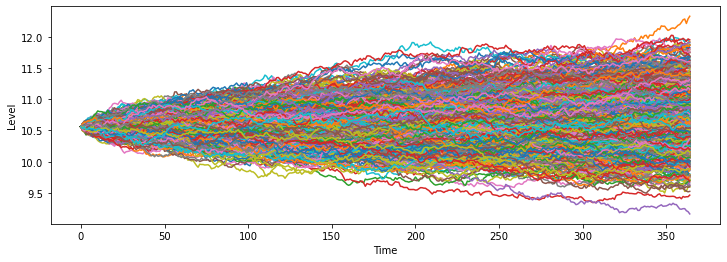

In [27]:
param3 = ModelParameters(10.56,365,1/365,0.03,0.015,0.001,0.01,0.1,0.05, 0.01, 0.01, 0.015, 0.5, 0.015, 0.05, 0.05, 0.04)
R3=[[]]*1000
for s in range(1000):
    r=heston_model_levels(param3)
    R3[s]=r
plt.figure(figsize=(12, 4))
for path in R3:
    path_i = plt.plot(path[0])
    path_i = plt.xlabel('Time')
    path_i = plt.ylabel('Level')

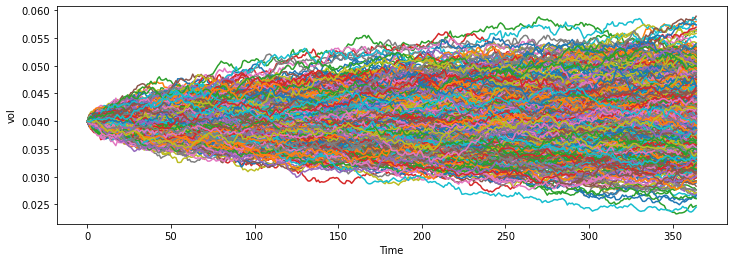

In [28]:
plt.figure(figsize=(12, 4))
for path in R3:
    path_i = plt.plot(path[1])
    path_i = plt.xlabel('Time')
    path_i = plt.ylabel('vol')

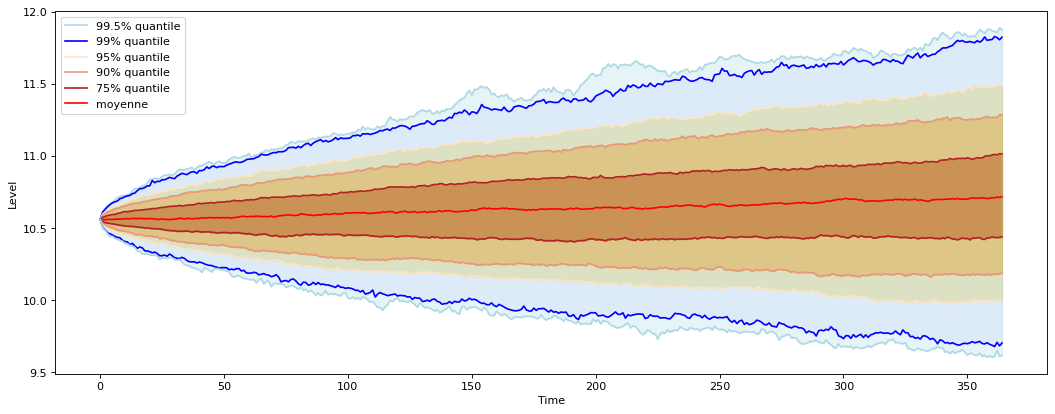

In [29]:
Xt3 = [[R3[j][0][i] for j in range(1000)] for i in range(365)]
Max = []
qt_99 = []
qt_95 = []
qt_90 = []
qt_75 = []
moy = []
qt_25 = []
qt_10 = []
qt_05 = []
qt_01 = []
Min = []
for x in Xt3:
    Max.append(np.quantile(x,0.995))
    qt_99.append(np.quantile(x,0.99))
    qt_95.append(np.quantile(x,0.95))
    qt_90.append(np.quantile(x,0.90))
    qt_75.append(np.quantile(x,0.75))
    moy.append(np.quantile(x,0.5))
    qt_25.append(np.quantile(x,0.25))
    qt_10.append(np.quantile(x,0.1))
    qt_05.append(np.quantile(x,0.05))
    qt_01.append(np.quantile(x,0.01))
    Min.append(np.quantile(x,0.005))
plt.figure(figsize=(16, 6), dpi=80)
plt.plot(Max, color='lightblue', label = "99.5% quantile")
plt.plot(qt_99, color='blue', label = "99% quantile")
plt.plot(qt_95, color='bisque', label = "95% quantile")
plt.plot(qt_90, color='darksalmon', label = "90% quantile")
plt.plot(qt_75, color='firebrick', label = "75% quantile")
plt.plot(moy, color='red', label = "moyenne")
plt.plot(qt_25, color='firebrick')
plt.plot(qt_10, color='darksalmon')
plt.plot(qt_05, color='bisque')
plt.plot(qt_01, color='blue')
plt.plot(Min, color='lightblue')
plt.fill_between(range(365), qt_75, qt_25, color='firebrick', alpha = 1)
plt.fill_between(range(365), qt_90, qt_10, color='darkorange', alpha = 0.5)
plt.fill_between(range(365), qt_95, qt_05, color='gold', alpha = 0.3)
plt.fill_between(range(365), qt_99, qt_01, color='blue', alpha = 0.05)
plt.fill_between(range(365), Max, Min, color='lightblue', alpha = 0.3)
plt.xlabel('Time')
plt.ylabel('Level')
plt.legend()